In [21]:
import numpy as np
import pandas as pd

# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

# We will display plots right inside Jupyter Notebook
%matplotlib inline
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible. Sometimes it can take longer to load.
# Use : %config InlineBackend.figure_format = 'png' in that case
%config InlineBackend.figure_format = 'svg'

In [22]:
df = pd.read_csv('Data/Expert_Opinions.csv')

In [23]:
df = df.drop([0],axis=0) # deleting the heading row

In [24]:
df.head()

,Unnamed: 0,Unnamed: 1,0,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131
1,NaN,6/2/2018 0:17:49,NaN,Option 2,dsds,1.0,1.0,2.0,2.0,2.0,...,1.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,1.0,1.0
2,NaN,6/2/2018 0:21:27,NaN,Option 1,edc,2.0,2.0,3.0,2.0,2.0,...,2.0,3.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0
3,NaN,6/2/2018 0:17:49,NaN,Option 2,dsds,1.0,1.0,2.0,2.0,3.0,...,1.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,1.0,1.0
4,NaN,6/2/2018 0:21:27,NaN,Option 1,edc,2.0,2.0,3.0,2.0,2.0,...,2.0,3.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0
5,NaN,6/2/2018 0:21:27,NaN,Option 1,edc,1.0,2.0,3.0,3.0,3.0,...,2.0,3.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0


Each row represents an **Expert** entry and each column represents a **Participant** entry.

In [25]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', '0', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 122', 'Unnamed: 123', 'Unnamed: 124', 'Unnamed: 125',
       'Unnamed: 126', 'Unnamed: 127', 'Unnamed: 128', 'Unnamed: 129',
       'Unnamed: 130', 'Unnamed: 131'],
      dtype='object', length=132)

In [26]:
df = df.drop(['Unnamed: 1'],axis=1) # deleting the timestamp column

In [27]:
df = df.dropna(axis=1)

In [28]:
df.head()

,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131
1,Option 2,dsds,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,...,1.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,1.0,1.0
2,Option 1,edc,2.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,...,2.0,3.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0
3,Option 2,dsds,1.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,...,1.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,1.0,1.0
4,Option 1,edc,2.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,...,2.0,3.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0
5,Option 1,edc,1.0,2.0,3.0,3.0,3.0,2.0,2.0,3.0,...,2.0,3.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0


So, we see that there are 120 columns. This is because there are 10 participants and 12 responses for each participants. The breakdown of questions are:
- 1 question for choosing the better mockup.
- 1 question for filling in the comments.
- 5 questions with 2 subparts (one for each option).

#### Creating meaningful columns

In [29]:
# Setting the constants
numQues = 5
colsPerParticipant = 2*numQues + 2
numParticipants = int(len(df.columns)/colsPerParticipant)

In [30]:
ques = ['Q' + str(i) for i in range(1,numQues+1)]
part = ['P'+str(i) for i in range(1,numParticipants+1)]
opt = ['O1','O2']
design = [part[i]+'D' for i in range(len(part))]
comments = [part[i]+'C' for i in range(len(part))] 

In [31]:
design

['P1D', 'P2D', 'P3D', 'P4D', 'P5D', 'P6D', 'P7D', 'P8D', 'P9D', 'P10D']

In [32]:
tmp = [part[j] + ques[i] for j in range(len(part)) for i in range(len(ques))]
tmp = [tmp[i] + opt[j] for i in range(len(tmp)) for j in range(len(opt))]

In [33]:
final = []
k = 0
for i in range(len(tmp)):
    if i%10 == 0:
        final.append(design[k])
        final.append(comments[k])
        k += 1
    final.append(tmp[i])

In [34]:
(final[12:24])

['P2D',
 'P2C',
 'P2Q1O1',
 'P2Q1O2',
 'P2Q2O1',
 'P2Q2O2',
 'P2Q3O1',
 'P2Q3O2',
 'P2Q4O1',
 'P2Q4O2',
 'P2Q5O1',
 'P2Q5O2']

Above are the values collected for each participant. Each participant will have 12 questions and 1 column for each question. Hence, we have 120 columns for 10 participants. Here, the nomenclature is such:
* P1D: For participant1 what is the design preference
* P1C: For participant1 what are the comments
* P1Q1O1: For participant1 question1 option1 what is the rating given
* P1Q1O2: For participant1 question1 option2 what is the rating given

In [35]:
df.columns = final

In [36]:
df.iloc[:5,:20]

,P1D,P1C,P1Q1O1,P1Q1O2,P1Q2O1,P1Q2O2,P1Q3O1,P1Q3O2,P1Q4O1,P1Q4O2,P1Q5O1,P1Q5O2,P2D,P2C,P2Q1O1,P2Q1O2,P2Q2O1,P2Q2O2,P2Q3O1,P2Q3O2
1,Option 2,dsds,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0,Option 2,fdfdv,1.0,1.0,3.0,2.0,1.0,2.0
2,Option 1,edc,2.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,Option 1,fbb gfg,2.0,2.0,2.0,1.0,2.0,3.0
3,Option 2,dsds,1.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,3.0,1.0,Option 2,fdfdv,1.0,1.0,3.0,2.0,1.0,2.0
4,Option 1,edc,2.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,Option 1,fbb gfg,2.0,2.0,2.0,1.0,2.0,3.0
5,Option 1,edc,1.0,2.0,3.0,3.0,3.0,2.0,2.0,3.0,1.0,2.0,Option 1,fbb gfg,2.0,1.0,2.0,1.0,2.0,3.0


In [37]:
optionsdict = {'Option 1':1,'Option 2':2}
for c in df.columns:
    if c[-1] == 'D': df = df.replace({c:optionsdict})
# replace the columns with design choices (ends with 'D') 
# between option 1 & 2 with numeric values (makes understanding easy)

In [38]:
df.iloc[:5,:20]

,P1D,P1C,P1Q1O1,P1Q1O2,P1Q2O1,P1Q2O2,P1Q3O1,P1Q3O2,P1Q4O1,P1Q4O2,P1Q5O1,P1Q5O2,P2D,P2C,P2Q1O1,P2Q1O2,P2Q2O1,P2Q2O2,P2Q3O1,P2Q3O2
1,2,dsds,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0,2,fdfdv,1.0,1.0,3.0,2.0,1.0,2.0
2,1,edc,2.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,1,fbb gfg,2.0,2.0,2.0,1.0,2.0,3.0
3,2,dsds,1.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,3.0,1.0,2,fdfdv,1.0,1.0,3.0,2.0,1.0,2.0
4,1,edc,2.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,1,fbb gfg,2.0,2.0,2.0,1.0,2.0,3.0
5,1,edc,1.0,2.0,3.0,3.0,3.0,2.0,2.0,3.0,1.0,2.0,1,fbb gfg,2.0,1.0,2.0,1.0,2.0,3.0


In [40]:
designmap = pd.read_csv('Data/Participant_Design_Map.csv')
[designmap] = designmap.values.T.tolist()

In [41]:
designmap

[0, 1, 0, 1, 0, 1, 0, 0, 1, 0]

#### Separate the designs with Assistant and designs without Assistant

In [42]:
with_assistant_cols = []
without_assistant_cols = []
k = 0
for c in df.columns:
    # Uncomment the lines below to add the cols which donot contain 'O' (the 'D' and 'C' cols)
    if 'O' not in c:
        ;
#         with_assistant_cols.append(c)
#         without_assistant_cols.append(c)
    # condition for design drawn with the assistant
    elif (c.endswith('1') and designmap[k] == 1)\
         or (c.endswith('2') and designmap[k] == 0):
        with_assistant_cols.append(c)
    # condition for design drawn without the assistant
    else:
        without_assistant_cols.append(c)
    
    if (df.columns.get_loc(c) + 1)%(colsPerParticipant) == 0: k += 1

In [43]:
wi_df = df[with_assistant_cols]
wo_df = df[without_assistant_cols]

- *wi_df* is the dataframe for designs drawn with the assistant 
- *wo_df* is the dataframe for designs drawn without the assistant

In [44]:
wi_df.describe()

,P1Q1O2,P1Q2O2,P1Q3O2,P1Q4O2,P1Q5O2,P2Q1O1,P2Q2O1,P2Q3O1,P2Q4O1,P2Q5O1,...,P9Q1O1,P9Q2O1,P9Q3O1,P9Q4O1,P9Q5O1,P10Q1O2,P10Q2O2,P10Q3O2,P10Q4O2,P10Q5O2
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.0,21.0,21.000000,21.0,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1.571429,2.380952,1.571429,2.142857,1.238095,1.571429,2.428571,1.571429,1.571429,1.857143,...,2.571429,2.0,2.0,1.857143,2.0,2.571429,1.857143,1.857143,1.857143,1.571429
std,0.507093,0.497613,0.507093,1.014185,0.436436,0.507093,0.507093,0.507093,0.507093,1.014185,...,0.507093,0.0,0.0,1.014185,0.0,0.507093,1.014185,1.014185,1.014185,0.507093
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,2.000000,2.0,2.0,1.000000,2.0,2.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,2.000000,2.0,2.0,1.000000,2.0,2.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,...,3.000000,2.0,2.0,1.000000,2.0,3.000000,1.000000,1.000000,1.000000,2.000000
75%,2.000000,3.000000,2.000000,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000,3.000000,...,3.000000,2.0,2.0,3.000000,2.0,3.000000,3.000000,3.000000,3.000000,2.000000
max,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,...,3.000000,2.0,2.0,3.000000,2.0,3.000000,3.000000,3.000000,3.000000,2.000000


## Visualization

In [45]:
# Getting rid of the 'P*' and 'O*' substrings
wi_df.columns = [x[-4:-2] for x in wi_df.columns]
wo_df.columns = [x[-4:-2] for x in wo_df.columns]

In [46]:
wi_df.iloc[:5,:]

,Q1,Q2,Q3,Q4,Q5,Q1,Q2,Q3,Q4,Q5,...,Q1,Q2,Q3,Q4,Q5,Q1,Q2,Q3,Q4,Q5
1,1.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,...,2.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,3.0,1.0
2,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,...,3.0,2.0,2.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0
3,1.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,...,2.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,3.0,1.0
4,2.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,2.0,1.0,...,3.0,2.0,2.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0
5,2.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,...,3.0,2.0,2.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0


In [49]:
# Grouping across different participants for question
wi_df_grouped_mean = wi_df.groupby(wi_df.columns, axis=1).mean()
wo_df_grouped_mean = wo_df.groupby(wo_df.columns, axis=1).mean()
# Taking mean for each question
wo_df_mean = wo_df_grouped_mean.mean()
wi_df_mean = wi_df_grouped_mean.mean()

In [50]:
# Similar to above, taking medians of median
wi_df_grouped_median = wi_df.groupby(wi_df.columns, axis=1).median()
wo_df_grouped_median = wo_df.groupby(wo_df.columns, axis=1).median()
wo_df_median = wo_df_grouped_median.median()
wi_df_median = wi_df_grouped_median.median()

In [51]:
ques_df_mean = pd.DataFrame([wo_df_mean, wi_df_mean]).T
ques_df_mean # col-0: Without the assistant, col-1: With the assistant

,0,1
Q1,1.995238,1.880952
Q2,1.619048,1.895238
Q3,2.119048,1.800000
Q4,1.847619,1.966667
Q5,1.747619,1.604762


In [52]:
ques_df_median = pd.DataFrame([wo_df_median, wi_df_median]).T
ques_df_median # col-0: Without the assistant, col-1: With the assistant

,0,1
Q1,2.0,2.0
Q2,1.5,2.0
Q3,2.0,2.0
Q4,2.0,2.0
Q5,1.5,2.0


In [56]:
def plot_ques_wise(df,ylabel):
    labels = ['Usability','Completeness','Familiarity','Atractiveness','Consistency']
    df.plot(kind='bar')
    plt.legend(['Without Assistant','With Assistant'])
    plt.xticks(range(5), labels, rotation=15)
    plt.xlabel('Parameters')
    plt.ylabel(ylabel)

### TODO: Add labels and whiskers to each bar

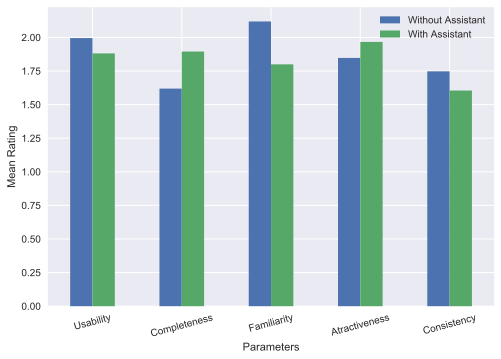

In [57]:
plot_ques_wise(ques_df_mean,'Mean Rating')

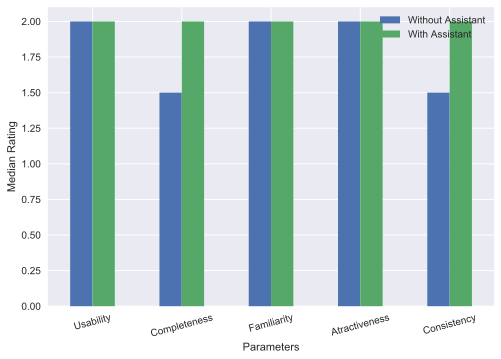

In [58]:
plot_ques_wise(ques_df_median, 'Median Rating')

### What are the other kinds of plots that can be drawn from experts data?